Library that Used in this Model

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
tf.random.set_seed(42)

Get Train and Test Files from Kaggle and assgin Train file to variable (train) and Test file to variable (test)

In [ ]:
#Read the CSV file (dataset)
train = pd.read_csv("Datasets/emnist-letters-train.csv", header=None)
test = pd.read_csv("Datasets/emnist-letters-test.csv", header=None)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
images = []
labels = []
for i in range(len(train)):
    image = np.flipud(np.rot90(train.iloc[i, 1:].to_numpy().reshape(28,28))) # iloc all Image Exclude the First
    images.append(image)
    label = train.iloc[i, 0] # First column only
    labels.append(label)
X_train = np.array(images)
y_train = np.array(labels)
y_train = y_train - 1

In [ ]:
images = []
labels = []
for i in range(len(test)):
    image = np.flipud(np.rot90(test.iloc[i, 1:].to_numpy().reshape(28,28)))
    images.append(image)
    label = test.iloc[i, 0]
    labels.append(label)
X_test = np.array(images)
y_test = np.array(labels)
y_test = y_test - 1

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(88800, 28, 28)
(88800,)
(14800, 28, 28)
(14800,)


are used to add an extra dimension to the input data arrays X_train and X_test. The purpose of adding this extra dimension is to make the data compatible with the input shape expected by certain types of neural network models, particularly when using libraries like TensorFlow or Keras.

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(88800, 28, 28, 1)
(88800,)
(14800, 28, 28, 1)
(14800,)


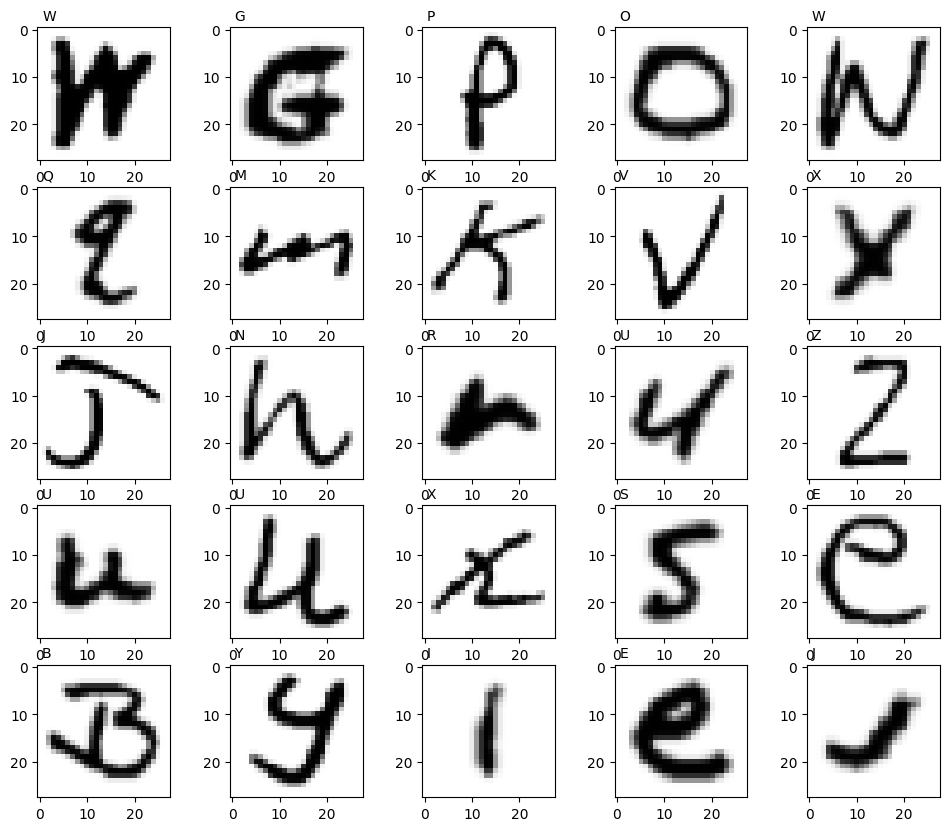

In [ ]:
plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):  
    plt.subplot(colums, row, i+1)
    plt.text(0.5, -2, chr(y_train[i] + 65))
    plt.imshow(X_train[i],interpolation='nearest', cmap='Greys')
plt.show()

 ANN(Artificial Neural Network) Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512,  activation='relu'),
    keras.layers.Dense(256,  activation='relu'),
    keras.layers.Dense(128,  activation='relu'),
    keras.layers.Dense(64,   activation='relu'),
    keras.layers.Dense(26,   activation='softmax')
])

 patience => The number of epochs with no improvement after which training will be stopped
 In My case, it's set to 5, meaning that if the validation loss does not improve for 5 consecutive epochs, training will be stopped.
 verbose => Controls the logging of messages. If set to 1, it will print a message when training is stopped due to early stopping.
 mode => Specifies whether the monitored quantity should be minimized or maximized. In this case, it's set to 'min', indicating that training will stop when the quantity being monitored (validation loss) stops decreasing.

In [ ]:
# Optimizing Algorithm for Backpropagation
optimizer_name = 'adam'
model.compile(
        optimizer=optimizer_name,
        loss='sparse_categorical_crossentropy',  # Multi classification
        metrics=['accuracy']
    )
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('ANN.model', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train,
                    y_train, 
                    epochs=20, 
                    batch_size=50, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/20
1597/1599 [============================>.] - ETA: 0s - loss: 1.2699 - accuracy: 0.6991
Epoch 1: val_loss improved from inf to 0.61156, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 41s 25ms/step - loss: 1.2692 - accuracy: 0.6992 - val_loss: 0.6116 - val_accuracy: 0.8197
Epoch 2/20
1599/1599 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.8401
Epoch 2: val_loss improved from 0.61156 to 0.52312, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 39s 24ms/step - loss: 0.5224 - accuracy: 0.8401 - val_loss: 0.5231 - val_accuracy: 0.8389
Epoch 3/20
1598/1599 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.8643
Epoch 3: val_loss improved from 0.52312 to 0.48902, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 38s 24ms/step - loss: 0.4316 - accuracy: 0.8644 - val_loss: 0.4890 - val_accuracy: 0.8584
Epoch 4/20
1599/1599 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.8790
Epoch 4: val_loss improved from 0.48902 to 0.43185, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 39s 25ms/step - loss: 0.3835 - accuracy: 0.8790 - val_loss: 0.4319 - val_accuracy: 0.8730
Epoch 5/20
1599/1599 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8910
Epoch 5: val_loss improved from 0.43185 to 0.42222, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 38s 24ms/step - loss: 0.3474 - accuracy: 0.8910 - val_loss: 0.4222 - val_accuracy: 0.8780
Epoch 6/20
1597/1599 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.9016
Epoch 6: val_loss did not improve from 0.42222
1599/1599 [==============================] - 38s 24ms/step - loss: 0.3121 - accuracy: 0.9016 - val_loss: 0.4367 - val_accuracy: 0.8822
Epoch 7/20
1597/1599 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.9080
Epoch 7: val_loss did not improve from 0.42222
1599/1599 [==============================] - 37s 23ms/step - loss: 0.2913 - accuracy: 0.9079 - val_loss: 0.4343 - val_accuracy: 0.8848
Epoch 8/20
1597/1599 [============================>.] - ETA: 0s - loss: 0.2752 - accuracy: 0.9129
Epoch 8: val_loss improved from 0.42222 to 0.40670, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 39s 24ms/step - loss: 0.2752 - accuracy: 0.9129 - val_loss: 0.4067 - val_accuracy: 0.8944
Epoch 9/20
1598/1599 [============================>.] - ETA: 0s - loss: 0.2499 - accuracy: 0.9198
Epoch 9: val_loss did not improve from 0.40670
1599/1599 [==============================] - 38s 24ms/step - loss: 0.2499 - accuracy: 0.9198 - val_loss: 0.4190 - val_accuracy: 0.8952
Epoch 10/20
1599/1599 [==============================] - ETA: 0s - loss: 0.2399 - accuracy: 0.9237
Epoch 10: val_loss did not improve from 0.40670
1599/1599 [==============================] - 45s 28ms/step - loss: 0.2399 - accuracy: 0.9237 - val_loss: 0.4438 - val_accuracy: 0.8890
Epoch 11/20
1598/1599 [============================>.] - ETA: 0s - loss: 0.2316 - accuracy: 0.9268
Epoch 11: val_loss improved from 0.40670 to 0.40381, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 40s 25ms/step - loss: 0.2316 - accuracy: 0.9268 - val_loss: 0.4038 - val_accuracy: 0.8961
Epoch 12/20
1596/1599 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9303
Epoch 12: val_loss did not improve from 0.40381
1599/1599 [==============================] - 32s 20ms/step - loss: 0.2170 - accuracy: 0.9303 - val_loss: 0.4268 - val_accuracy: 0.8965
Epoch 13/20
1598/1599 [============================>.] - ETA: 0s - loss: 0.2109 - accuracy: 0.9326
Epoch 13: val_loss did not improve from 0.40381
1599/1599 [==============================] - 32s 20ms/step - loss: 0.2109 - accuracy: 0.9326 - val_loss: 0.4423 - val_accuracy: 0.9003
Epoch 14/20
1598/1599 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9351
Epoch 14: val_loss improved from 0.40381 to 0.39544, saving model to ANN.model
INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


1599/1599 [==============================] - 41s 25ms/step - loss: 0.2050 - accuracy: 0.9351 - val_loss: 0.3954 - val_accuracy: 0.9082
Epoch 15/20
1599/1599 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9391
Epoch 15: val_loss did not improve from 0.39544
1599/1599 [==============================] - 37s 23ms/step - loss: 0.1869 - accuracy: 0.9391 - val_loss: 0.4394 - val_accuracy: 0.9008
Epoch 16/20
1597/1599 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9402
Epoch 16: val_loss did not improve from 0.39544
1599/1599 [==============================] - 36s 22ms/step - loss: 0.1896 - accuracy: 0.9402 - val_loss: 0.4305 - val_accuracy: 0.9039
Epoch 17/20
1597/1599 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9424
Epoch 17: val_loss did not improve from 0.39544
1599/1599 [==============================] - 38s 24ms/step - loss: 0.1791 - accuracy: 0.9424 - val_loss: 0.4505 - val_accuracy: 0.9018
Epoch 18/20
1598/15

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"val_loss is {val_loss}")
print(f"val_acc is {val_acc}")

463/463 [==============================] - 2s 4ms/step - loss: 0.5211 - accuracy: 0.8851
val_loss is 0.5210993885993958
val_acc is 0.8851351141929626


In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

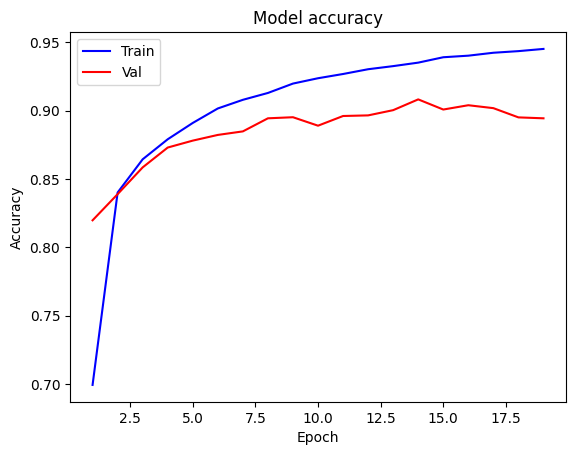

In [ ]:
plotgraph(epochs, acc, val_acc)

Loss Curve


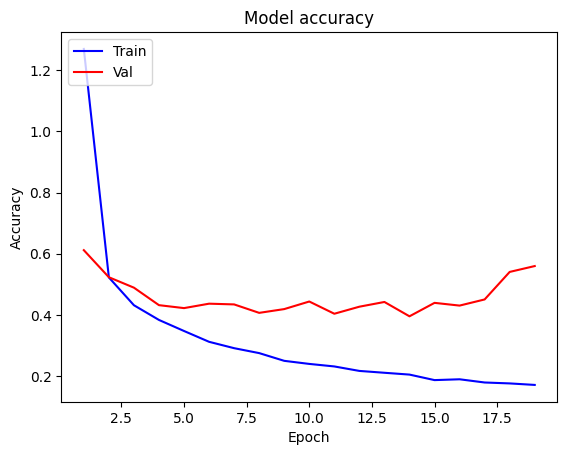

In [ ]:
# loss curve
print('Loss Curve')
plotgraph(epochs, loss, val_loss)

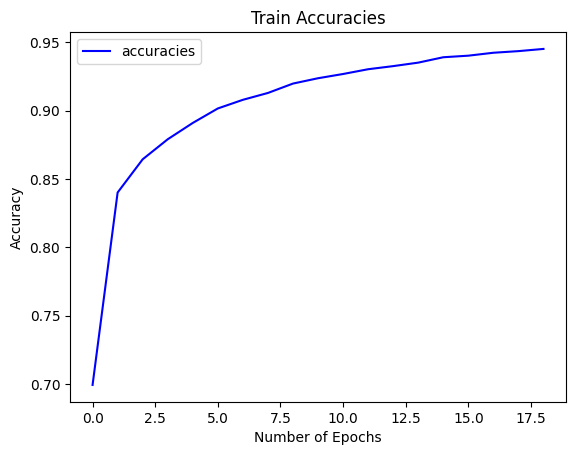

In [ ]:
plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

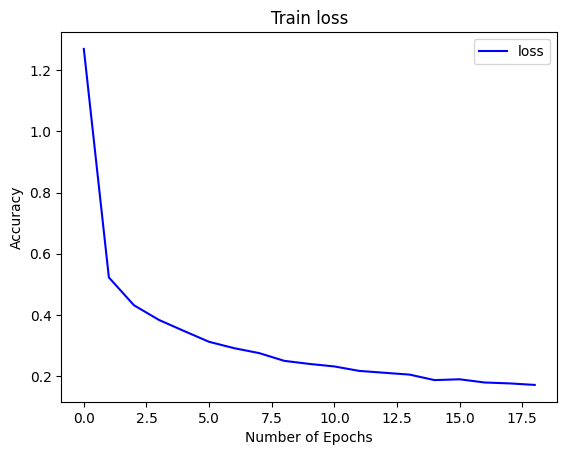

In [ ]:
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

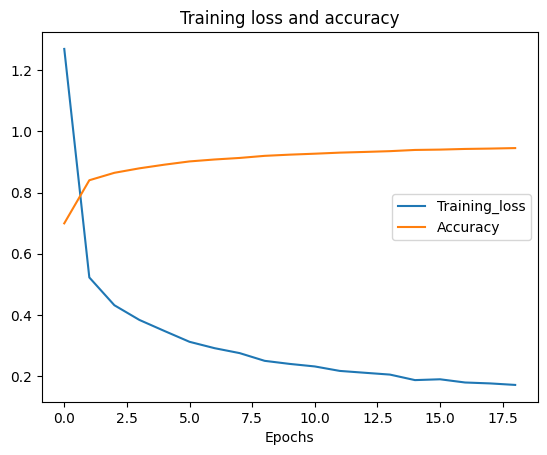

In [ ]:
N=len(history.epoch) #epoch
plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

In [ ]:
# Save the model
model.save('ANN.model')

INFO:tensorflow:Assets written to: ANN.model\assets


INFO:tensorflow:Assets written to: ANN.model\assets


In [ ]:
# Load best model
model = load_model("ANN.model")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 1024)              803840    
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 26)               